In [6]:
!pip install pytrends

In [13]:
!pip install --upgrade pip

Requirement already up-to-date: pip in /Applications/anaconda3/lib/python3.7/site-packages (20.2.1)


In [137]:
import pandas as pd     
import numpy as np
from pytrends.request import TrendReq
from pytrends import dailydata


In [149]:
list1 = ['Weather', 'Coronavirus', 'Pizza', 'Stimulus', 'Trump']
list2 = ['Weather', 'George Floyd', 'Protest', 'Biden', 'Police']

In [150]:
pytrends1 = TrendReq(hl='en-US', tz=360)
pytrends2 = TrendReq(hl='en-US', tz=360)

pytrends1.build_payload(list1, cat=0, timeframe = '2020-01-01 2020-08-13', geo='US', gprop='')
pytrends2.build_payload(list2, cat=0, timeframe = '2020-01-01 2020-08-13', geo='US', gprop='')

In [151]:
# Get Google Hot Trends data
df1=pytrends1.interest_over_time()
df1=df1.drop(['isPartial'], axis =1)

df2=pytrends2.interest_over_time()
df2=df2.drop(['isPartial'], axis =1)

In [152]:
multiplier = df2['Weather'] / df1['Weather']
multiplier = multiplier.mean()
multiplier

2.9510466757413156

In [153]:
df1_updated = (df1 * multiplier).round().astype(np.int64)
df1_updated = df1_updated.drop(['Weather'], axis = 1)
df1_updated

,Coronavirus,Pizza,Stimulus,Trump
date,,,,
2020-01-01,0,27,0,9
2020-01-02,0,15,0,6
2020-01-03,0,18,0,18
2020-01-04,0,21,0,15
2020-01-05,0,21,0,15
...,...,...,...,...
2020-08-07,18,21,24,15
2020-08-08,15,24,24,21
2020-08-09,18,21,18,21


In [154]:
df2

,Weather,George Floyd,Protest,Biden,Police
date,,,,,
2020-01-01,49,0,0,1,5
2020-01-02,53,0,0,1,5
2020-01-03,51,0,0,1,5
2020-01-04,53,0,0,0,4
2020-01-05,50,0,0,0,4
...,...,...,...,...,...
2020-08-07,45,1,0,6,5
2020-08-08,45,1,1,6,5
2020-08-09,44,1,1,6,5


In [201]:
df_merge = pd.merge(df1_updated, df2, on='date')
df_merge

,Coronavirus,Pizza,Stimulus,Trump,Weather,George Floyd,Protest,Biden,Police
date,,,,,,,,,
2020-01-01,0,27,0,9,49,0,0,1,5
2020-01-02,0,15,0,6,53,0,0,1,5
2020-01-03,0,18,0,18,51,0,0,1,5
2020-01-04,0,21,0,15,53,0,0,0,4
2020-01-05,0,21,0,15,50,0,0,0,4
...,...,...,...,...,...,...,...,...,...
2020-08-07,18,21,24,15,45,1,0,6,5
2020-08-08,15,24,24,21,45,1,1,6,5
2020-08-09,18,21,18,21,44,1,1,6,5


In [202]:
df_merge=df_merge.reset_index()

In [203]:
df_merge=df_merge.melt('date', value_name='value', var_name = 'name')


In [204]:
df_merge=df_merge.sort_values(['date', 'name'])
df_merge.head(20)

,date,name,value
1568,2020-01-01,Biden,1
0,2020-01-01,Coronavirus,0
1120,2020-01-01,George Floyd,0
224,2020-01-01,Pizza,27
1792,2020-01-01,Police,5
1344,2020-01-01,Protest,0
448,2020-01-01,Stimulus,0
672,2020-01-01,Trump,9
896,2020-01-01,Weather,49
1569,2020-01-02,Biden,1


In [221]:
len(df_merge)

2016

In [222]:
last_value = df_merge['value'].to_list()
len(last_value)

2016

In [223]:
del last_value[(len(df_merge)-10):-1]
len(last_value)

2007

In [224]:
for i in range(9):
   last_value.insert(0, 0)

len(last_value)

2016

In [49]:
df_['lastValue'] = last_value
df.head(20)

,date,keyword,value,lastValue
0,2020-01-01,Weather,17,NaN
446,2020-01-01,Pizza,9,NaN
669,2020-01-01,Stimulus,0,NaN
223,2020-01-01,Coronavirus,0,NaN
892,2020-01-01,Trump,3,NaN
1,2020-01-02,Weather,18,17.0
447,2020-01-02,Pizza,5,9.0
670,2020-01-02,Stimulus,0,0.0
224,2020-01-02,Coronavirus,0,0.0
893,2020-01-02,Trump,2,3.0


In [50]:
df.to_csv(path_or_buf = 'pytrends.csv')

In [7]:
# bcr.bar_chart_race(df)

In [ ]:
# df.to_csv(path_or_buf = 'pytrends_wide.csv')
# df_2020 = df.loc['20200101':'20200810']
# df_2020=df_2020.drop(['isPartial'], axis =1)

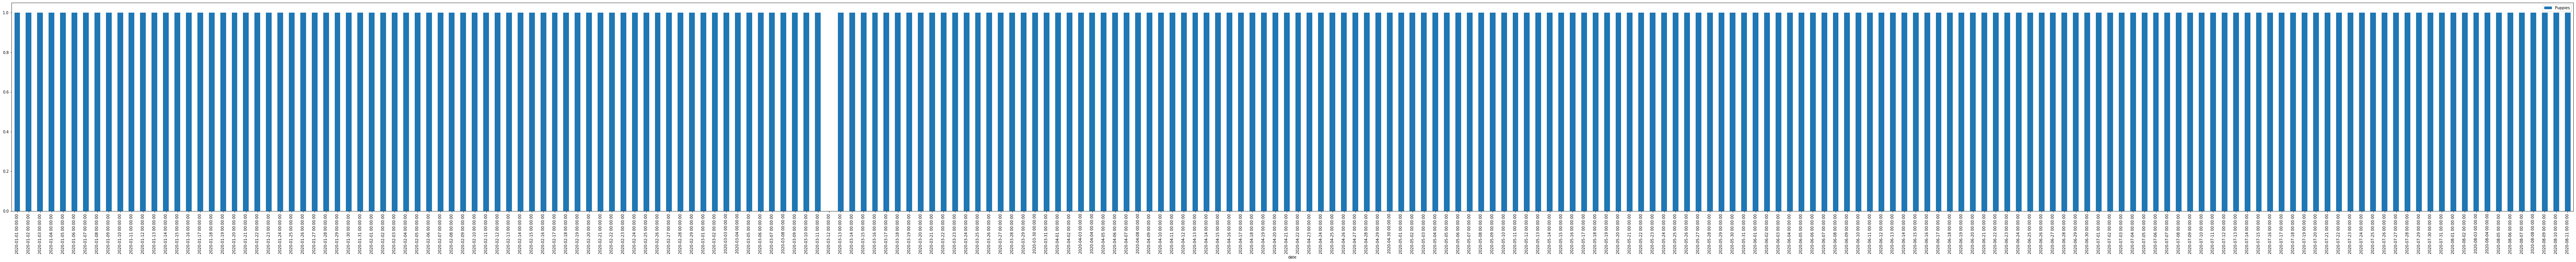

In [148]:
# df1.reset_index().plot(x='date', y='Puppies', figsize=(120, 10), kind ='bar')

In [193]:
# df = pytrends.today_searches()

In [7]:
# Get Google Keyword Suggestions
# keywords = pytrends.suggestions('coronavirus')
# df = pd.DataFrame(keywords)
# df.drop(columns= 'mid')   # This column makes no sense

In [80]:
# Related Topics, returns a dictionary of dataframes
# related_topic = pytrends.related_topics()
# print(related_topic.values())

In [79]:
# pytrends.top_charts(date='2019', hl='en-US', tz=360, geo='US')

In [81]:
# pytrends.trending_searches(pn='united_states') # trending searches in real time for United States

In [82]:
# pytrends.get_historical_interest(kw_list, year_start=2019, month_start=7, day_start=1, hour_start=0, year_end=2020, month_end=30, day_end=1, hour_end=0, cat=0, geo='US', gprop='', sleep=0)